In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

DATA_PATH = "../../data/processed/newtons_second_law_cleaned_dataset.csv"
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Feature-engineered dataset not found at: {DATA_PATH}")

In [2]:
df = pd.read_csv(DATA_PATH)
print(f"Loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

Loaded dataset: 3000 rows × 7 columns


,Mass_kg,Acceleration_ms2,Force_N,mass_x_acceleration,log_mass,log_acceleration,log_force
0,4.058131,13.486790,54.731161,54.731161,1.400723,2.601711,4.002433
1,9.531786,15.953960,152.069729,152.069729,2.254632,2.769707,5.024339
2,7.453942,5.084311,37.898163,37.898163,2.008743,1.626160,3.634903
3,6.187256,12.534995,77.557215,77.557215,1.822492,2.528524,4.351016
4,1.982177,11.477745,22.750923,22.750923,0.684196,2.440410,3.124606


In [3]:
features = ["Mass_kg", "Acceleration_ms2"]
target = "Force_N"

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
model = SymbolicRegressor(
    population_size=2000,
    generations=30,
    stopping_criteria=0.001,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.001,
    random_state=42
)

model.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    37.95      3.87285e+07        3      3.22439e-15      3.22982e-15      2.64m


SymbolicRegressor(generations=30, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=2000, random_state=42,
                  stopping_criteria=0.001, verbose=1)

In [5]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 1.0000
RMSE: 0.0000


In [6]:
print("Discovered symbolic expression:")
print(model._program)

Discovered symbolic expression:
mul(X1, X0)


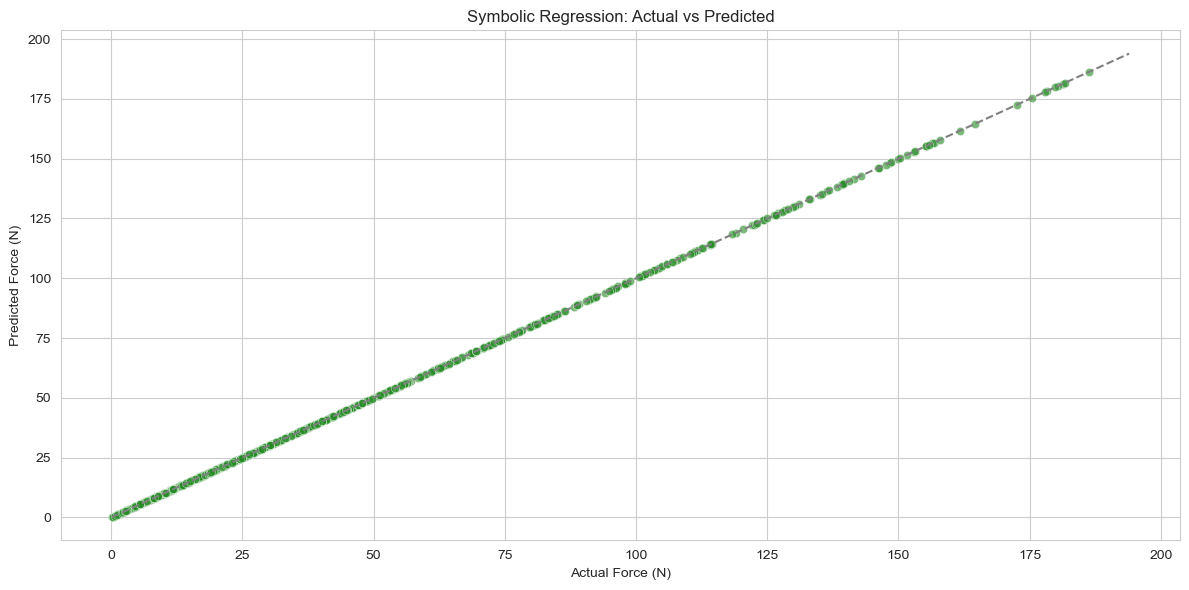

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="forestgreen")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel("Actual Force (N)")
plt.ylabel("Predicted Force (N)")
plt.title("Symbolic Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()

In [8]:
os.makedirs("../../results/formulas/", exist_ok=True)

with open("../../results/formulas/newtons_law_symbolic_expression.txt", "w") as f:
    f.write(str(model._program))

print("Saved discovered formula to results/formulas/newtons_law_symbolic_expression.txt")

Saved discovered formula to results/formulas/newtons_law_symbolic_expression.txt
